In [1]:
%matplotlib widget

import torch
import numpy as np
import meshplot as mp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import torch_mpfd_solver as torchsolver
import random
import time

In [2]:
### Havercamp plotting

dt = 120.
zN = 40.
tN = random.randint(360,1440)


psiB = random.uniform(-150,-50)
psiT = random.uniform(-50,-30)


# Test problem for plotting errors
#tN = 360
#psiB = -61.5
#psiT = -20.7

#Dirichlet condition
flag = 0

psiInitial = sorted([random.uniform(psiB,psiB) for _ in range(int(zN-1))])
psiInitial = np.hstack([psiB,psiInitial,psiT])

z,t,dts,dz,n,nt,zN,psi,psiB,psiT,pars = torchsolver.setup(dt,tN,zN,psiInitial,torchsolver.havercampSetpars)

startTime = time.time()
psiList = torchsolver.fullModelRun(dt,dts,dz,n,nt,psi,psiB,psiT,pars, torchsolver.havercampCfun,torchsolver.havercampKfun,torchsolver.havercampthetafun,flag,torchsolver.zeroFun)
output = torchsolver.outputWrapper(psiList,flag,psiB,psiT)
print(time.time()-startTime)

z=np.hstack([0,z,zN])
z=z[-1]-z

torchsolver.massBalance(output,torchsolver.havercampKfun,torchsolver.havercampthetafun,dz,dts,pars)


3.0718867778778076


tensor([1.0000], grad_fn=<DivBackward0>)

In [3]:
output

[tensor([-53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758,
         -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758,
         -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758,
         -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758,
         -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758,
         -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -31.4160],
        grad_fn=<CatBackward0>),
 tensor([-53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758, -53.8758,
         -53.8758, -53.8757, -53.8757, -53.8757, -53.8757, -53.8756, -53.8755,
         -53.8753, -53.8750, -53.8745, -53.8738, -53.8725, -53.8705, -53.8672,
         -53.8619, -53.8532, -53.8392, -53.8164, -53.7795, -53.7199, -53.6238,
         -53.4695, -53.2238, -52.8370, -52.2389, -51.3390, -50.0369, -48.2502,
         -45.9568, -43.2280, -40.2240, -37.1444, -34.1685, -31.4160],
        grad_fn=<CatBackward0>),
 ten

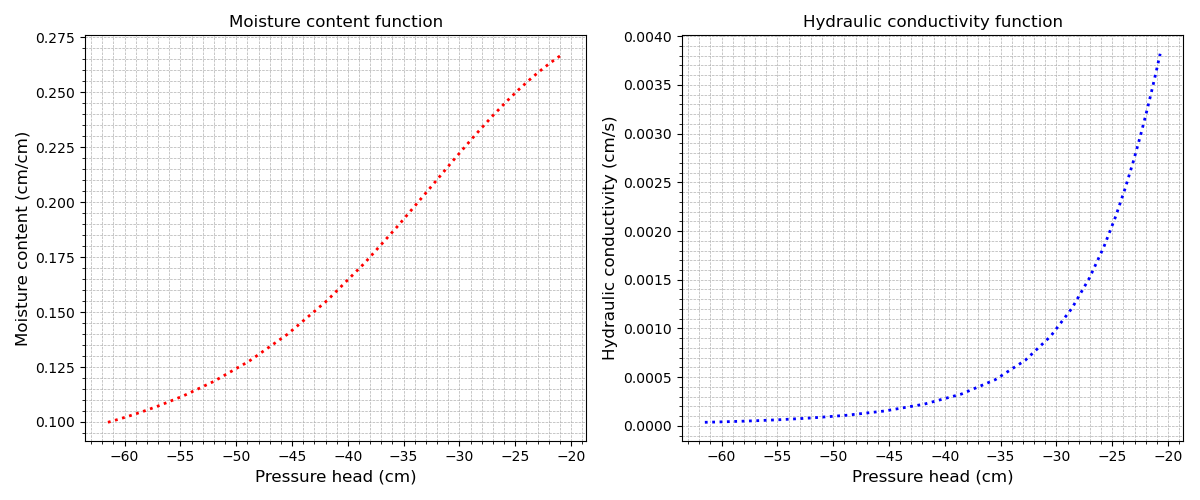

In [37]:
#Constitutive relationship plot (havercamp)

thetaOutput = torchsolver.havercampthetafun(output[-1],pars)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#ax2.plot(z, output[0],linestyle=':',linewidth=2.0,label = "t=0")
ax1.plot(output[-1].detach().numpy(),thetaOutput.detach().numpy(),linestyle=':',linewidth=2.0,color='red')

ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.minorticks_on()
ax1.set_xlabel("Pressure head (cm)", fontsize=12)
ax1.set_ylabel("Moisture content (cm/cm)", fontsize=12)
ax1.set_title("Moisture content function")

kOutput = torchsolver.havercampKfun(output[-1],pars)


ax2.plot(output[-1].detach().numpy(),kOutput.detach().numpy(),linestyle=':',linewidth=2.0,color='blue')


ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.minorticks_on()
ax2.set_xlabel("Pressure head (cm)", fontsize=12)
ax2.set_ylabel("Hydraulic conductivity (cm/s)", fontsize=12)
ax2.set_title("Hydraulic conductivity function")


plt.tight_layout()  # Adjusts spacing between plots for readability
plt.show()


In [2]:
# Gardner plotting

dt = 500.
zN = 30.
tN = 10000
pars = torchsolver.gardnerSetpars()
flag = 0


thetaB = 0.1035
thetaT = 0.4115

psiB = torchsolver.gardnerhfun(thetaB,pars)
psiT = torchsolver.gardnerhfun(thetaT,pars)

#psiB = random.uniform(-150,-50)
#psiT = random.uniform(-50,-30)


#Dirichlet condition


#psiInitial = sorted([random.uniform(psiB,psiB) for _ in range(int(zN-1))])
#psiInitial = np.hstack([psiB,psiInitial,psiT])






thetaInitial = [torchsolver.gardnerinitialprofile(_) for _ in range(int(zN-1))]
psiInitial = [torchsolver.gardnerhfun(_,pars) for _ in thetaInitial]
psiInitial = np.hstack([psiB,np.flip(psiInitial),psiT])


#inner elemens in psiinitial needs to be inverted (i.e. index i = index N-i)

z,t,dts,dz,n,nt,zN,psi,psiB,psiT,pars = torchsolver.setup(dt,tN,zN,psiInitial,torchsolver.gardnerSetpars)

psiTreal = [torch.tensor([torchsolver.gardnertopboundaryfun(_,pars)], dtype=torch.float32) for _ in t]

psiList = torchsolver.fullModelRun(t,dts,dz,n,nt,psi,psiB,psiTreal,pars,torchsolver.gardnerCfun,torchsolver.gardnerKfun,torchsolver.gardnerthetafun,flag,torchsolver.zeroFun)
output = torchsolver.outputWrapper(psiList,flag,psiB,psiT)






In [3]:
output[0]

torchsolver.gardnersinkfun(output[0],pars)
#psiInitial



tensor([0.0000, 0.0000, 0.0000, 0.0017, 0.0108, 0.0189, 0.0262, 0.0328, 0.0389,
        0.0445, 0.0498, 0.0547, 0.0593, 0.0636, 0.0677, 0.0716, 0.0753, 0.0788,
        0.0821, 0.0853, 0.0884, 0.0914, 0.0942, 0.0970, 0.0996, 0.1022, 0.1046,
        0.1070, 0.1093, 0.1116, 0.1116], grad_fn=<WhereBackward0>)

10000

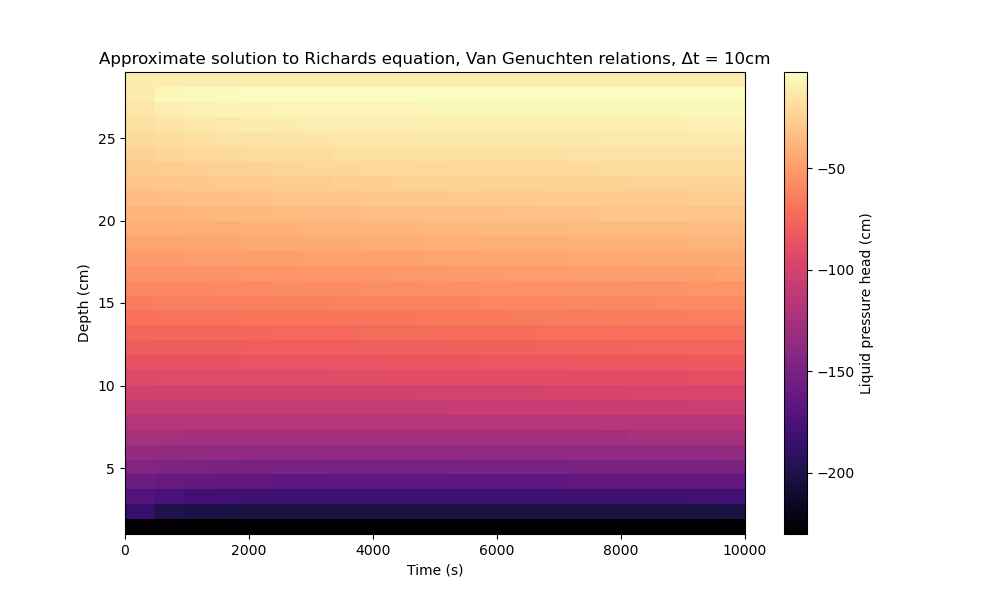

In [4]:
#spacetime plot, havercamp


plt.figure(figsize=(10, 6))

# Adjust the extent of the plot using the timepoints
plt.imshow((torch.stack(output,axis=0).detach().numpy()).T, aspect='auto', cmap='magma', extent=[t[0], t[-1], z[0],z[-1]],origin = 'lower')
plt.colorbar(label='Liquid pressure head (cm)')
plt.xlabel('Time (s)')
plt.ylabel('Depth (cm)')
plt.title(f'Approximate solution to Richards equation, Van Genuchten relations, Δt = 10cm')



tN

Text(0, 0.5, 'Pressure head (cm)')

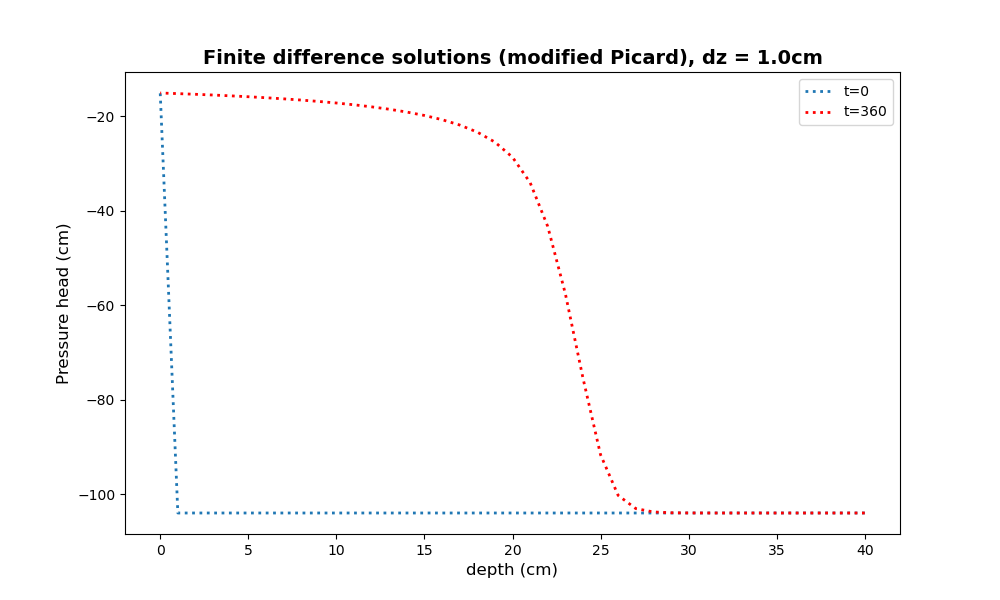

In [5]:

    


fig,ax2 = plt.subplots(figsize=(10, 6))
#ax2.plot(z, output[0],linestyle=':',linewidth=2.0,label = "t=0")
ax2.plot(z, output[-1],linestyle=':',linewidth=2.0,color='red',label=f"t={tN}")

ax2.legend(title='')
ax2.set_title("Finite difference solutions (modified Picard), dz = 1.0cm", fontsize=14, fontweight='bold')
ax2.set_xlabel("depth (cm)", fontsize=12)
ax2.set_ylabel("Pressure head (cm)", fontsize=12)




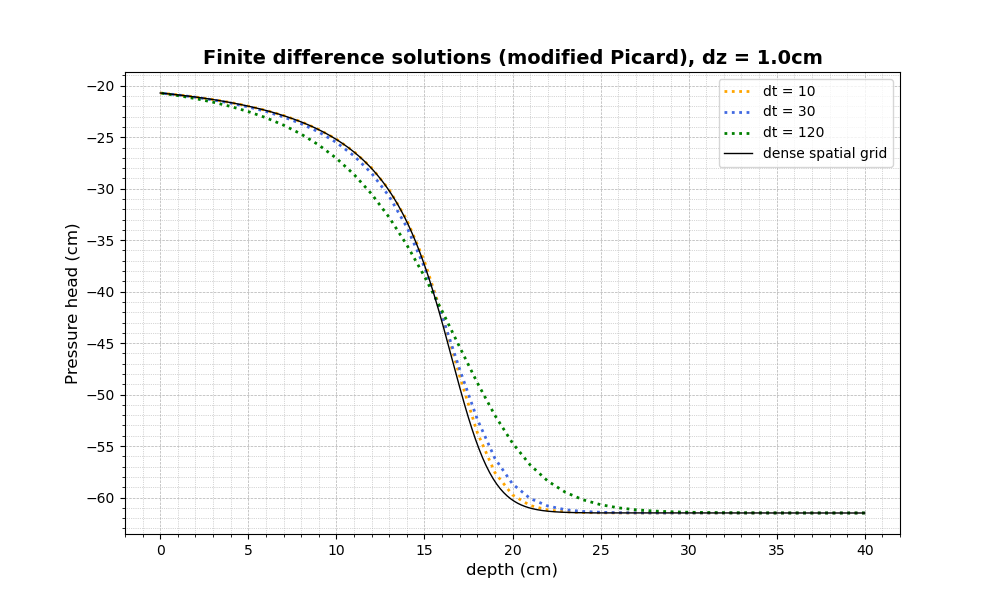

In [7]:
### Plotting test ###

# coarser grid, different timescales.

fig,ax3 = plt.subplots(figsize=(10, 6))
colors = ['orange','royalblue','green']

dtValues = [10,30,120]
zN = 40.
tN = 360.
psiB = -61.5
psiT = -20.7
flag = 0



psiInitial = np.hstack([psiB,np.full(39,-61.5),psiT])





for i in range(len(dtValues)):
    z,t,dts,dz,n,nt,zN,psi,psiB,psiT,pars = torchsolver.setup(dtValues[i],tN,zN,psiInitial,torchsolver.havercampSetpars)
    psiList = torchsolver.fullModelRun(dt,dts,dz,n,nt,psi,psiB,psiT,pars, torchsolver.havercampCfun,torchsolver.havercampKfun,torchsolver.havercampthetafun,flag,torchsolver.zeroFun)
    #psifinal=np.hstack([psiB,psi[-1].detach().numpy(),psiT])
    output = torchsolver.outputWrapper(psiList,flag,psiB,psiT)
    z=np.hstack([0,z,zN])
    z=z[-1]-z
    ax3.plot(z, output[-1].detach().numpy(),label= f"dt = {dtValues[i]}",color=colors[i],linestyle=':',linewidth=2.0)


ax3.legend(title='')
ax3.set_title("Finite difference solutions (modified Picard), dz = 1.0cm", fontsize=14, fontweight='bold')
ax3.grid(True)
ax3.set_xlabel("depth (cm)", fontsize=12)
ax3.set_ylabel("Pressure head (cm)", fontsize=12)


ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.minorticks_on()
ax3.grid(True, which='minor', linestyle=':', linewidth=0.5)


# dense grid

dt = 10.
zN = 40.
tN = 360.

psiInitial = np.hstack([psiB,np.full(399,-61.5),psiT])


z,t,dts,dz,n,nt,zN,psi,psiB,psiT,pars = torchsolver.setup(dt,tN,zN,psiInitial,torchsolver.havercampSetpars)


psiList = torchsolver.fullModelRun(dt,dts,dz,n,nt,psi,psiB,psiT,pars, torchsolver.havercampCfun,torchsolver.havercampKfun,torchsolver.havercampthetafun,flag,torchsolver.zeroFun)
output = torchsolver.outputWrapper(psiList,flag,psiB,psiT)
z=np.hstack([0,z,zN])
z=z[-1]-z





ax3.plot(z, output[-1].detach().numpy(),label=f"dense spatial grid",color="black",linewidth=1.0)
ax3.legend()


plt.show()


In [26]:
print(psiList)


[tensor([-61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5000,
        -61.5000, -61.5000, -61.5000, -61.5000, -61.5000, -61.5

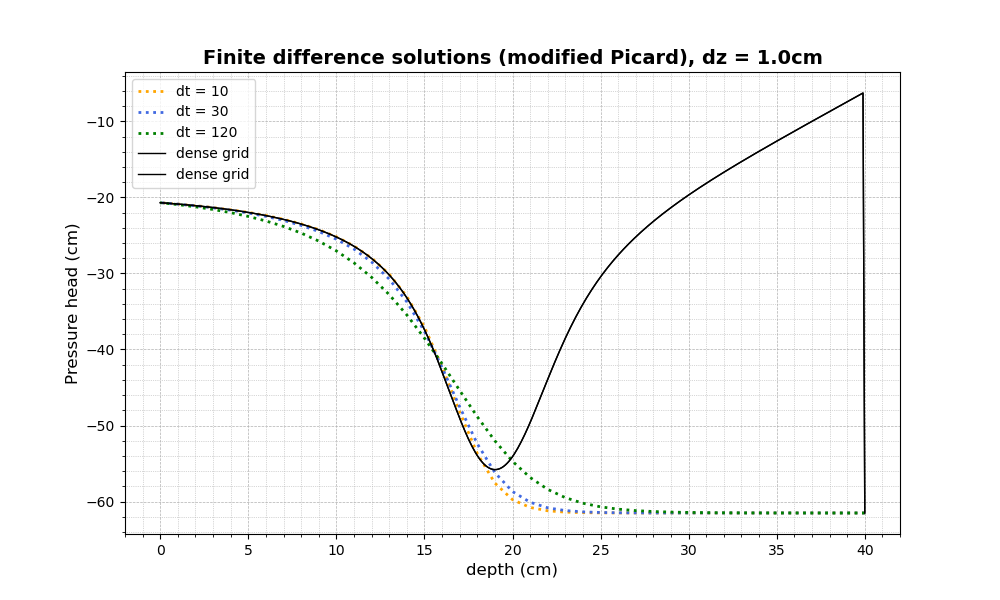

In [47]:
z=np.hstack([0,z,zN])
z=z[-1]-z
ax3.plot(z, output[-1].detach().numpy(),label=f"dense grid",color="black",linewidth=1.0)
ax3.legend()


plt.show()